<a href="https://colab.research.google.com/github/SethupathyM/Supervised-ML---Regression/blob/main/Hetero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing
import numpy as np
import pandas as pd
from numpy import math
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/Mydrive')

Mounted at /content/Mydrive


In [57]:
# reading the data
data = pd.read_csv('/content/Mydrive/MyDrive/AlmaBetter/Modules/Machine Learning/Projects/Copy of SeoulBikeData.csv',encoding= 'unicode_escape')

In [58]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [59]:
print(len(data.columns))
print(len(data.describe().columns))

14
10


In [60]:
lst = list(data.describe().columns)
lst.remove('Rainfall(mm)')
lst.remove('Snowfall (cm)')
lst.remove('Hour')
lst

['Rented Bike Count',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)']

In [61]:
# Step 1 of dealing with Heteroscedasticity
# Outliers treatment by replacing the outliers with median
for i in lst:
  quantile1,quantile3 = np.percentile(data[i],[25,75])
  # print('Quantile1:',quantile1)
  # print('Quantile3:',quantile3)
  iqr = quantile3 - quantile1
  # print('IQR:',iqr)
  lower_bound_val = quantile1 - (1.5 * iqr)
  upper_bound_val = quantile3 + (1.5 * iqr)
  # print(i+'_Lower Bound:',lower_bound_val)
  print(i+'_Upper Bound:',upper_bound_val)
  data[i] = data[i].apply(lambda x: data[i].median() if x > upper_bound_val else x)

Rented Bike Count_Upper Bound: 2376.625
Temperature(°C)_Upper Bound: 51.0
Humidity(%)_Upper Bound: 122.0
Wind speed (m/s)_Upper Bound: 4.3999999999999995
Visibility (10m)_Upper Bound: 3590.0
Dew point temperature(°C)_Upper Bound: 44.05
Solar Radiation (MJ/m2)_Upper Bound: 2.325


In [98]:
# Step 2 of dealing with heteroscedasticity
# log transformation of features
data['log_temp'] = np.log10(data['Temperature(°C)'])
data['log_Wind_speed'] = np.log10(data['Wind speed (m/s)'])
data['log_Humidity'] = np.log10(data['Humidity(%)'])
data['log_Visibility'] = np.log10(data['Visibility (10m)'])
data['log_Dew_point_temperature'] = np.log10(data['Dew point temperature(°C)'])
data['log_Solar_Radiation'] = np.log10(data['Solar Radiation (MJ/m2)'])
data['log_Rainfall'] = np.log10(data['Rainfall(mm)'])
data['log_Snowfall'] = np.log10(data['Snowfall (cm)'])
data['log_Rented_Bike_Count'] = np.log10(data['Rented Bike Count'])


In [99]:
# Replacing infinite values
data.replace([np.inf,-np.inf],np.nan,inplace = True)
data.fillna(0,inplace =True)

In [100]:
col = ['log_temp','log_Humidity','log_Wind_speed','log_Visibility','log_Rainfall','log_Snowfall']
col1 = ['Temperature(°C)','Wind speed (m/s)','Humidity(%)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']

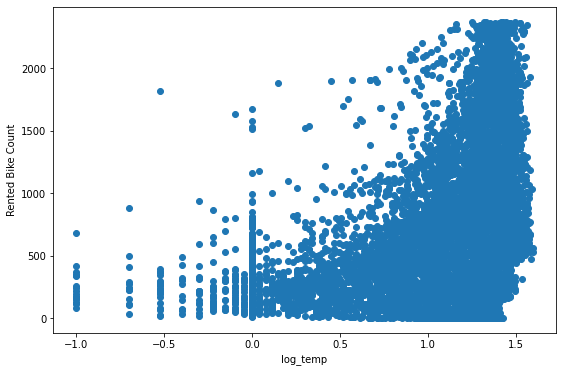

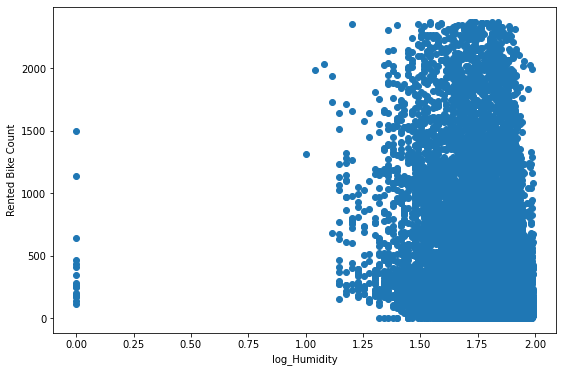

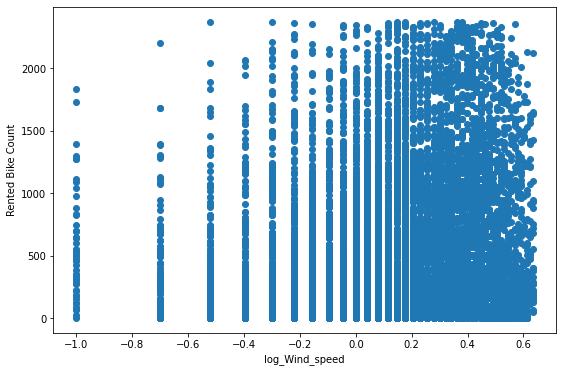

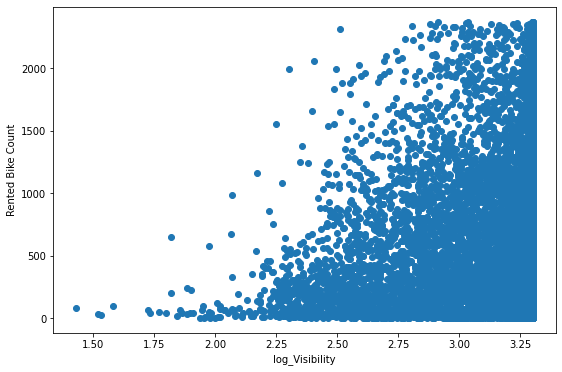

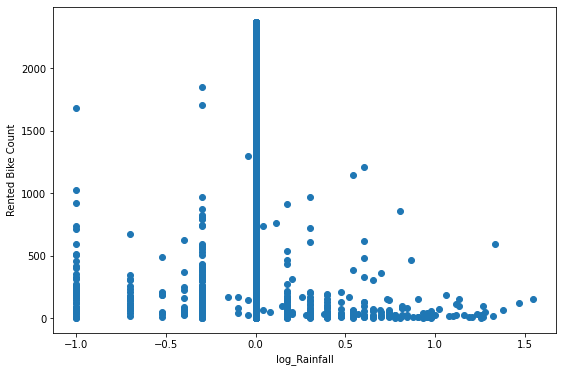

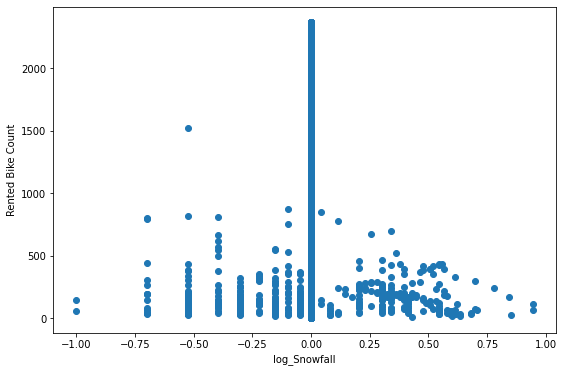

In [115]:
for i in col:
  plt.figure(figsize=(9,6))
  y = data['Rented Bike Count']
  plt.scatter(data[i],y)
  plt.xlabel(i)
  plt.ylabel('Rented Bike Count')

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)
calc_vif(data[[i for i in data[indep_var]]])

,variables,VIF
0,log_temp,1.354202
1,log_Wind_speed,1.191633
2,log_Solar_Radiation,1.252179
3,log_Rainfall,1.005630
4,log_Snowfall,1.003591


In [116]:
indep_var = ['log_temp','log_Humidity','log_Visibility','log_Wind_speed','log_Solar_Radiation','log_Rainfall','log_Snowfall']
col1 = ['Temperature(°C)','Wind speed (m/s)','Humidity(%)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
dep_var = ['Rented Bike Count']
x = data[indep_var].values
y = data[dep_var].values
# print(data['log_Snowfall'].max())
# print(data['log_Snowfall'].min())

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 0 )

In [118]:
# Poly Regression
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
x_train_poly = poly_features.fit_transform(x_train)
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)
y_train_predicted = poly_model.predict(x_train_poly)
y_test_predict = poly_model.predict(poly_features.fit_transform(x_test))
from sklearn.metrics import r2_score
print('Train R2:',r2_score(y_train,y_train_predicted))
print('Test R2:',r2_score(y_test, y_test_predict))
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_test_predict))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

Train R2: 0.43307057098805124
Test R2: 0.4112714517904389
Adjusted R2 :  0.4089084358285886


In [119]:
# Linear Regression
reg = LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_train,y_train)
y_test_pred = reg.predict(x_test)
print('R2 score : ',r2_score(y_test, y_test_pred))
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_test_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

R2 score :  0.3116740391176943
Adjusted R2 :  0.30891126289855664
